# VGG16v2 for Breast Cancer Diagnostic

## Importing the libraries

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses, Model

## Loading data

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('BreastsData/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 345 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('BreastsData/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 71 images belonging to 3 classes.


## Building the model

In [11]:
# base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

58892288/58889256 [==============================] - 6s 0us/step


In [12]:
for layer in base_model.layers:
  layer.trainable = False

In [13]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(3, activation = 'softmax')(x)

In [14]:
model = Model(inputs = base_model.input, outputs = predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Fitting the model

In [15]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
11/11 [==============================] - 38s 3s/step - loss: 5.6809 - accuracy: 0.4725 - precision: 0.4704 - val_loss: 1.5477 - val_accuracy: 0.6901 - val_precision: 0.7424
Epoch 2/20
11/11 [==============================] - 40s 4s/step - loss: 1.3793 - accuracy: 0.7014 - precision: 0.7076 - val_loss: 0.8058 - val_accuracy: 0.7183 - val_precision: 0.7246
Epoch 3/20
11/11 [==============================] - 40s 4s/step - loss: 0.7400 - accuracy: 0.7739 - precision: 0.7755 - val_loss: 1.0769 - val_accuracy: 0.7746 - val_precision: 0.7746
Epoch 4/20
11/11 [==============================] - 40s 4s/step - loss: 0.4565 - accuracy: 0.8464 - precision: 0.8488 - val_loss: 0.6999 - val_accuracy: 0.7465 - val_precision: 0.7465
Epoch 5/20
11/11 [==============================] - 39s 4s/step - loss: 0.3735 - accuracy: 0.8841 - precision: 0.8841 - val_loss: 0.2903 - val_accuracy: 0.8451 - val_precision: 0.8451
Epoch 6/20
11/11 [==============================] - 43s 4s/step - loss: 0.1657 -

## Plotting the results

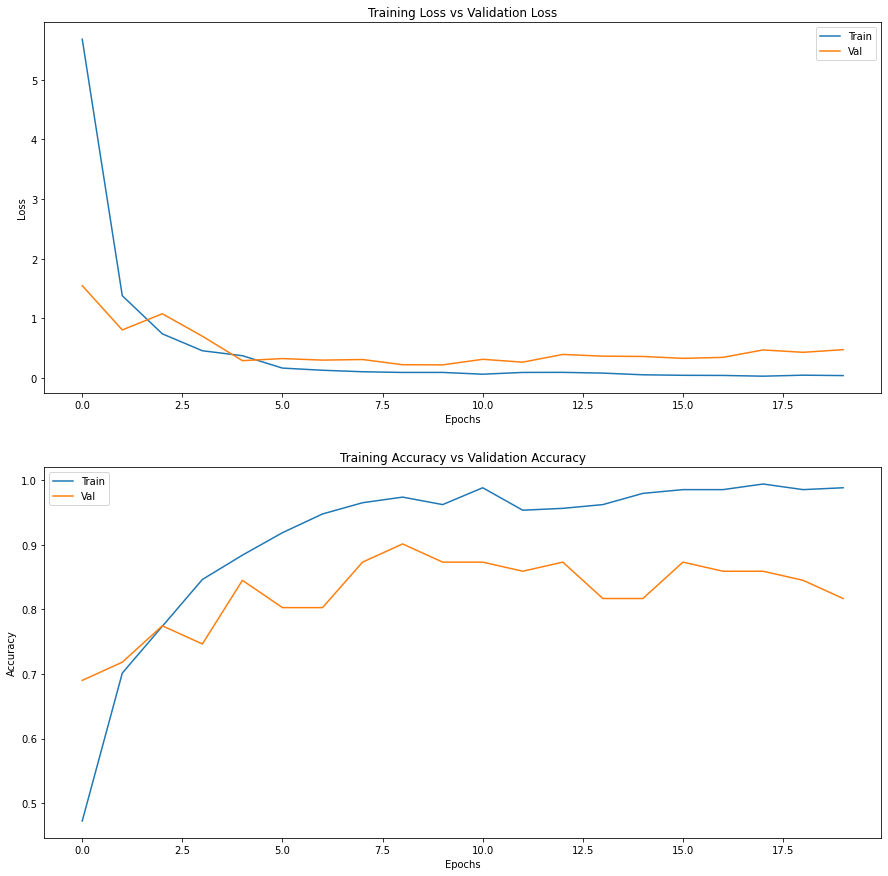

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

## Making one prediction

In [17]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('OnePrediction/cancer/5.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices


the_result = -1
value=float('-inf')

for i in range(len(result[0])):
    if result[0][i]-value>0.00001: 
        the_result = i
        value = result[0][i]

if the_result == 0:
    prediction = 'benign'
elif the_result:
    prediction = 'cancer'
else: 
    prediction = 'normal'


In [18]:
print(prediction)

cancer
